In [ ]:
from gmusicapi import Mobileclient
import pandas as pd
import seaborn as sns

In [1]:
''' Set up Google Play Music API '''

api = Mobileclient()
api.login('YOUR_NAME@gmail.com', 'YOUR_PASSWORD', Mobileclient.FROM_MAC_ADDRESS)
songs = api.get_all_songs()

# Note: if you are using 2FA, you will need to create an app password and use it in the field above:
# https://myaccount.google.com/apppassword

True

In [80]:
''' Set up plotting preferences'''

sns.set(context='notebook',style='whitegrid')
%matplotlib inline

In [81]:

def chart(label):
    ''' Multipurpose plotting function '''
    
    cols = ['playCount','artist','genre','title']
    df = pd.DataFrame(songs)
    hits = df[cols].copy()
    
    if label == 'song':
        hits.loc[:,'song'] = hits['artist'].copy() + ' - ' + hits['title']
        label = 'song'
    hits = hits.groupby(label).sum()
    hits = pd.DataFrame(hits.unstack().sort_values(ascending=False)).head(10)
    hits = hits.reset_index().drop('level_0',axis=1)
    hits.index = hits[label]
    
    hits.plot(kind='barh',rot=0,figsize=(7,5),fontsize=13,legend=False,colormap='viridis');



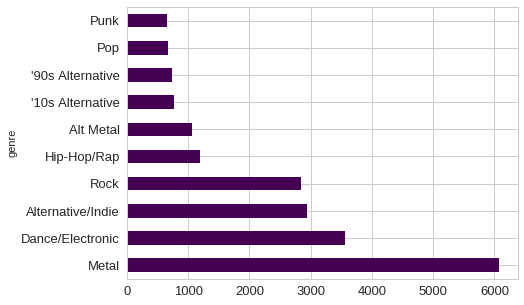

In [82]:
chart('genre')

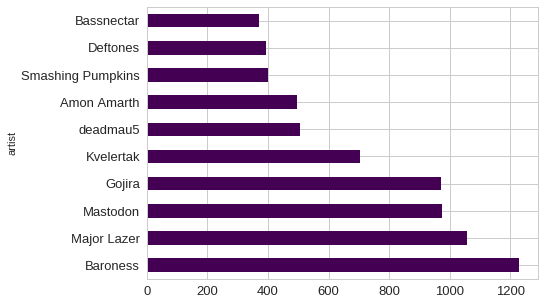

In [83]:
chart('artist')

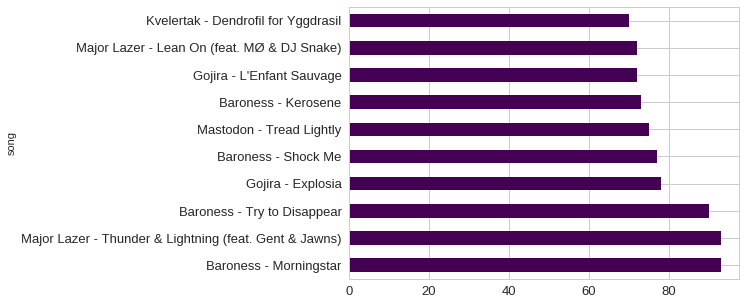

In [84]:
chart('song')